<a href="https://colab.research.google.com/github/a-cuc/CPE312/blob/main/Hands_on_Activity_1_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.1 : Introduction to Machine Learning

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements.

Import the libraries and the dataset

In [ ]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('Iris_Data.csv')
#check the content of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Determine the following:
* The number of data points (rows).
* The column names.
* The data types for each column.

In [ ]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [ ]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determine the following:
* The number of each species present.
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [ ]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [ ]:
# The mean calculation
data.groupby('species').mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [ ]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

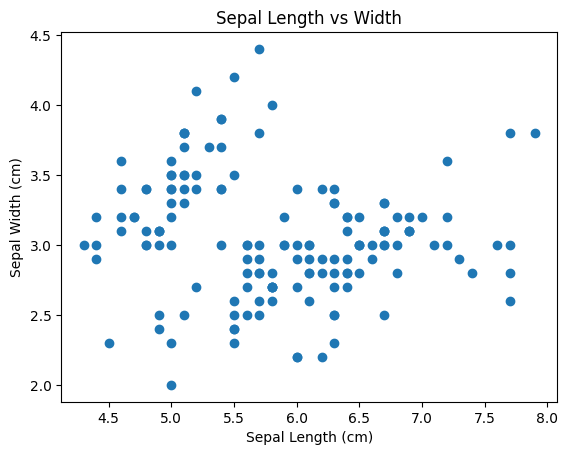

In [ ]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot.

It can be seen that there is no particular pattern seen, which could mean that there is no possible correlation between sepal length and sepal width.

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

A histogram shows the frequency of a certain feature label occuring, in the case below, it shows the frequency of petal length.

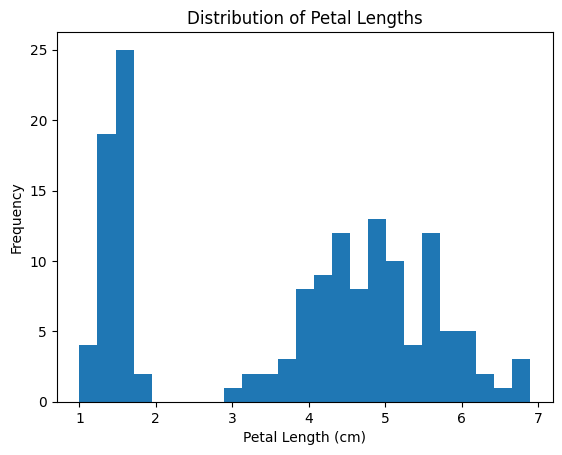

In [ ]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot?

A boxplot shows the distribution of each target (as seen by the by= keyword in the code) by the feature (as seen that there are four graphs)



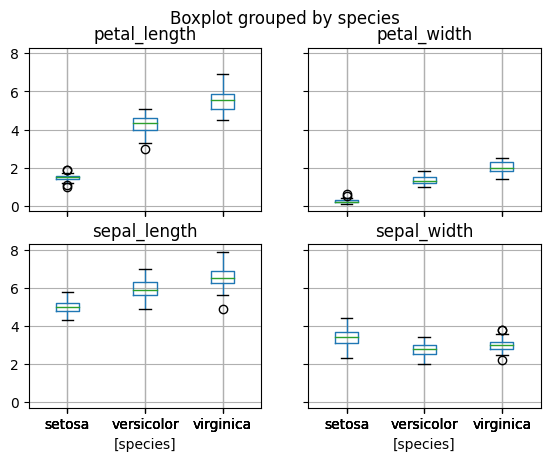

In [ ]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [ ]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


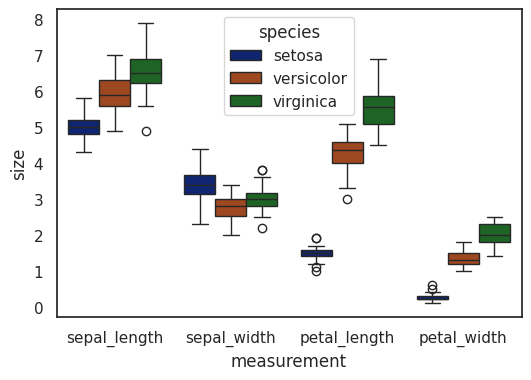

In [ ]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements.

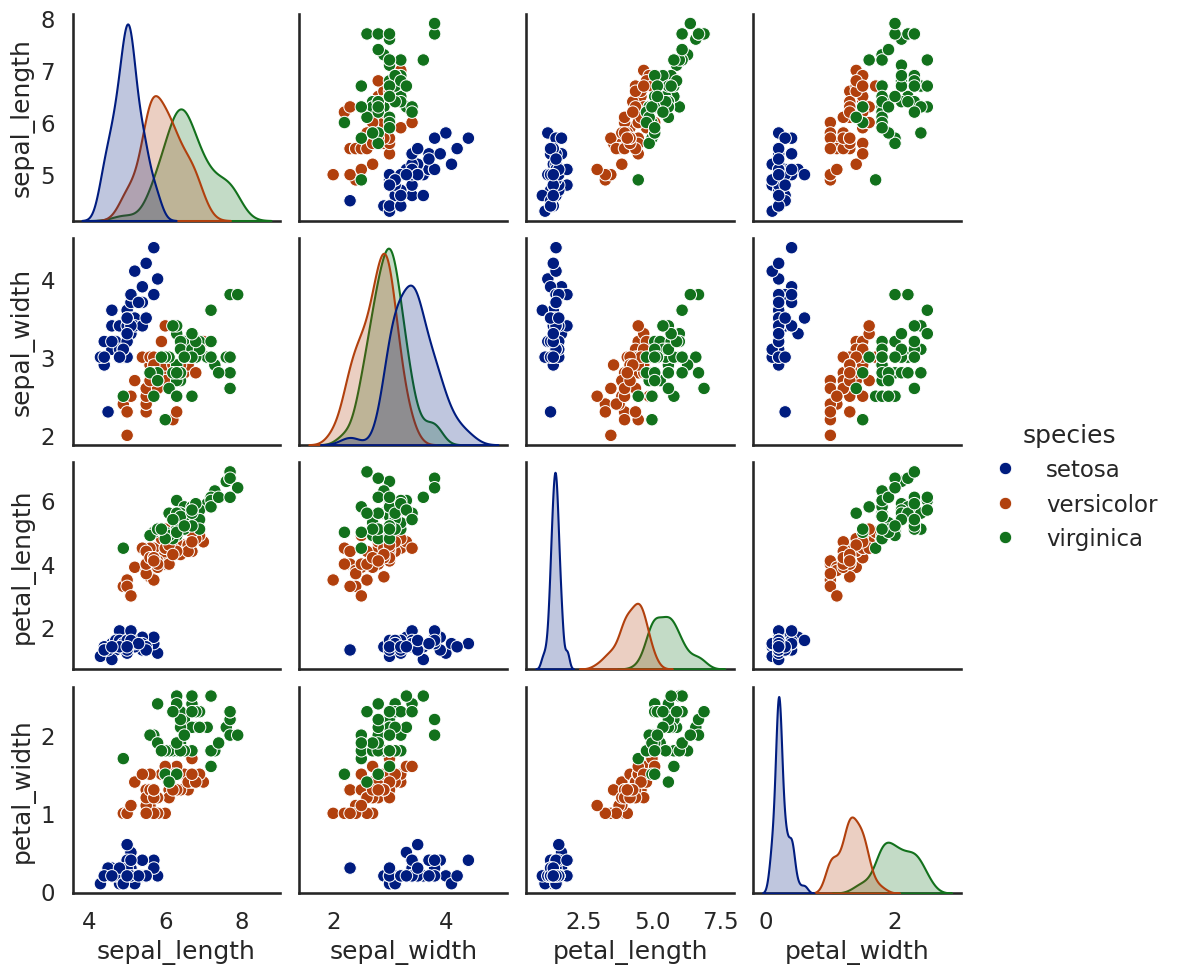

In [ ]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');



Interpret the result of correlation using the pairplot

It can be seen that petal length and width has scatterplots which suggest a positive correlation, although setosa is seen as an outlier.

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

In [ ]:
# type your code here
# The dataset that I have chosen is the Room Occupancy using IoT dataset
df = pd.read_csv('Occupancy.csv')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
# Determine the number of datapoints, columns and datatypes
df.info()
# It can be seen that there are 6 features and 1 target columns
# with 1 feature being an object datatype, 5 features being float, and 1 target being int
# There are also 20,560 initial datapoints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# Remove unneccesary columns
# I decided to drop the date feature to simplify the processing
df.drop(['date'], axis=1, inplace=True)
df

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


<Axes: >

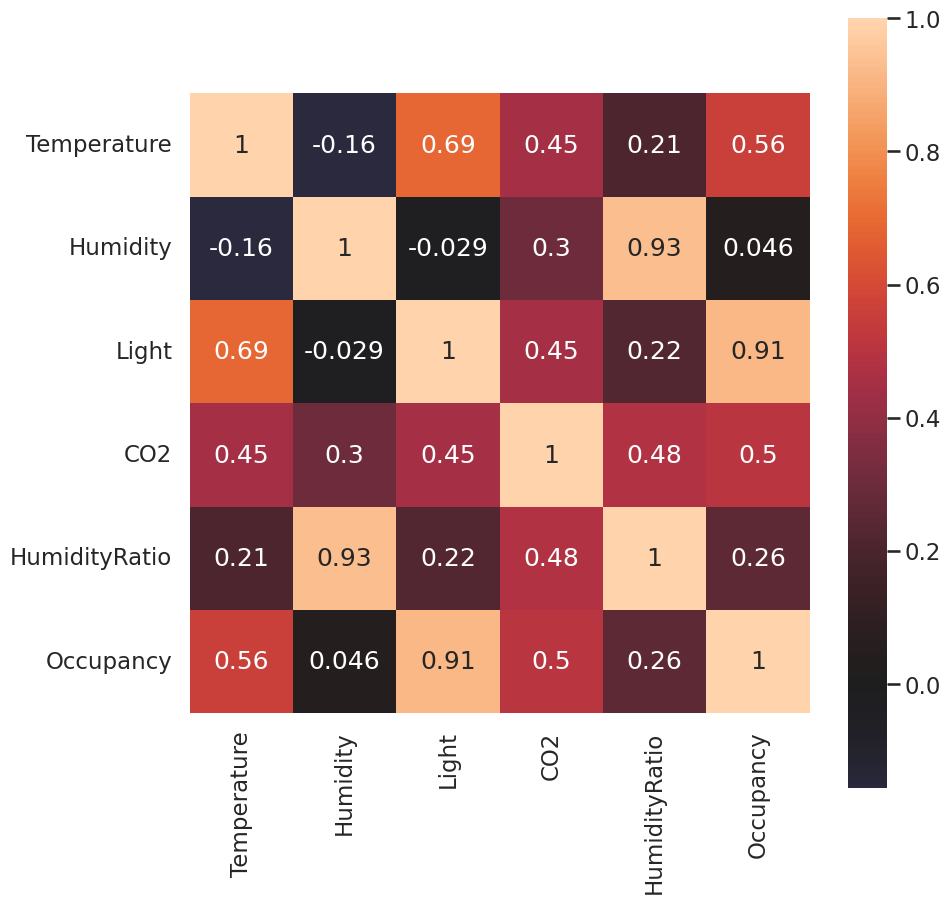

In [ ]:
# Plots the correlations of each variable
plt.figure(figsize=(10,10))
sns.heatmap(
    df.sort_index().corr(),
    annot=True, center=0, square=True
)
# It can be noticed the correlations between features and target are already high except the humidity,
# Therefore it might be better to drop the humidity feature for the model to be more accurate

In [ ]:
# Do data cleaning such as removing empty values
# Checks for duplicated values
df[df.duplicated()].shape[0]

1441

In [ ]:
# Removes duplicates
df.drop_duplicates(inplace=True)
df
# As seen earlier with df.info(), there is no null values

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
20555,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,20.8900,28.0225,418.750000,1632.000000,0.004279,1


In [ ]:
# Perform descriptive statistics such as mean, median and mode
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000
mean,20.964184,27.659026,140.502353,703.073166,0.004244,0.248287
std,1.060804,4.934163,215.011742,316.089682,0.000762,0.432030
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.267500,24.500000,0.000000,466.000000,0.003734,0.000000
50%,20.790000,27.290000,0.000000,574.000000,0.004300,0.000000
75%,21.650000,31.200000,408.416667,824.000000,0.004836,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


In [ ]:
# Shows the median of the features and target
df.median()

,0
Temperature,20.7900
Humidity,27.2900
Light,0.0000
CO2,574.0000
HumidityRatio,0.0043
Occupancy,0.0000


In [ ]:
# Shows the mode of the features and target
df.mode()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,20.39,30.39,0.0,438.0,0.003327,0


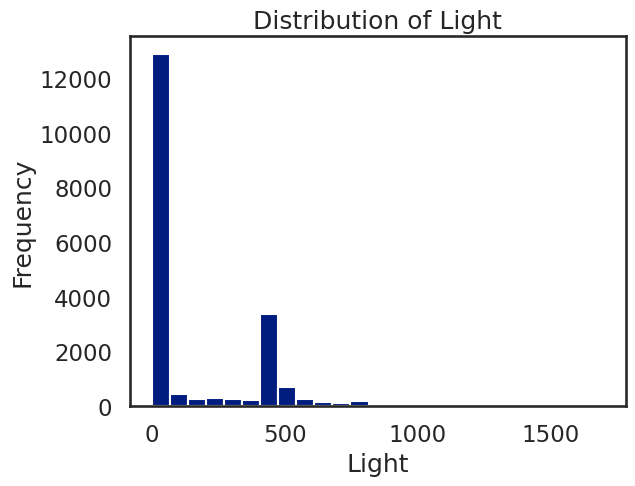

In [ ]:
# Compare and analyze your data using data visualization
# As seen earlier, the correlation between the target (occupancy) and the feature light is the highest
# We could visualize each variable using matplotlib

# Draws a histogram for Light
ax = plt.axes()
ax.hist(df.Light, bins=25);
ax.set(xlabel='Light',
       ylabel='Frequency',
       title='Distribution of Light');
# It can be seen that most of the data is at 0, and a considerable spike at around 500

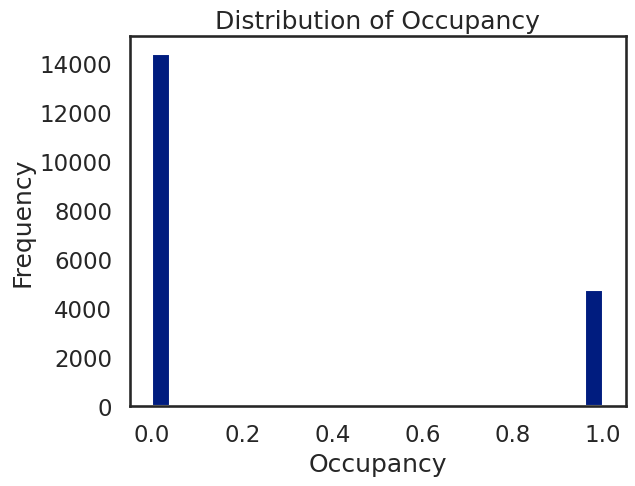

In [ ]:
# Plotting the histogram of the Occupancy
ax = plt.axes()
ax.hist(df.Occupancy, bins=25);
ax.set(xlabel='Occupancy',
       ylabel='Frequency',
       title='Distribution of Occupancy');
# It can be noticed the most of the data is at 0 (unoccupied),
# which is similar to the light histogram seen earlier, which could explain the high correlation

Conclusion:

It can be concluded that there are different ways to manipulate data to be fit for machine learning. By using pandas and numpy we are able to do data cleaning and simple descriptive statistics such as mean, median, and mode. By using matplotlib and seaborn I was able to better describe the data through visualizations.